In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# Import libraries 
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os 
import datetime
from datetime import timedelta
import seaborn as sns
from sklearn.metrics import mean_squared_error

In [4]:
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/TrafficForecasting/comptages-routiers-permanents.csv", sep=';')

In [5]:
relevant_features = ["Date et heure de comptage", "Libelle", "Débit horaire", "Taux d'occupation", "Etat trafic"]
df_ = df[relevant_features]

In [6]:
df_["datetime"] = pd.to_datetime(df_["Date et heure de comptage"].astype(str), format='%Y%m%d %H:%M:%S', utc=False)
df_["datetime_utc"] = pd.to_datetime(df_["Date et heure de comptage"].astype(str), format='%Y%m%d %H:%M:%S', utc=True)
df_["date_utc"] = pd.to_datetime(df_["Date et heure de comptage"].astype(str), format='%Y%m%d %H:%M:%S', utc=True).dt.date
df_["time_utc"] = pd.to_datetime(df_["Date et heure de comptage"].astype(str), format='%Y%m%d %H:%M:%S', utc=True).dt.time
df_["weekday_utc"] = pd.to_datetime(df_["Date et heure de comptage"].astype(str), format='%Y%m%d %H:%M:%S', utc=True).dt.day_name()
df_.drop(columns=["Date et heure de comptage"], inplace=True)

<ipython-input-6-4904461fcc34>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_["datetime"] = pd.to_datetime(df_["Date et heure de comptage"].astype(str), format='%Y%m%d %H:%M:%S', utc=False)
<ipython-input-6-4904461fcc34>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_["datetime_utc"] = pd.to_datetime(df_["Date et heure de comptage"].astype(str), format='%Y%m%d %H:%M:%S', utc=True)
<ipython-input-6-4904461fcc34>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a Da

In [7]:
df_

,Libelle,Débit horaire,Taux d'occupation,Etat trafic,datetime,datetime_utc,date_utc,time_utc,weekday_utc
0,AV_Champs_Elysees,1120.0,49.90000,Saturé,2022-06-17 16:00:00+02:00,2022-06-17 14:00:00+00:00,2022-06-17,14:00:00,Friday
1,AV_Champs_Elysees,1024.0,13.06278,Fluide,2021-12-14 00:00:00+01:00,2021-12-13 23:00:00+00:00,2021-12-13,23:00:00,Monday
2,AV_Champs_Elysees,1141.0,17.64834,Pré-saturé,2021-12-13 23:00:00+01:00,2021-12-13 22:00:00+00:00,2021-12-13,22:00:00,Monday
3,AV_Champs_Elysees,1132.0,30.02667,Saturé,2021-12-13 20:00:00+01:00,2021-12-13 19:00:00+00:00,2021-12-13,19:00:00,Monday
4,AV_Champs_Elysees,1226.0,31.65889,Saturé,2021-12-13 19:00:00+01:00,2021-12-13 18:00:00+00:00,2021-12-13,18:00:00,Monday
...,...,...,...,...,...,...,...,...,...
9157,AV_Champs_Elysees,396.0,4.35834,Fluide,2022-09-01 03:00:00+02:00,2022-09-01 01:00:00+00:00,2022-09-01,01:00:00,Thursday
9158,AV_Champs_Elysees,274.0,3.19278,Fluide,2022-08-01 04:00:00+02:00,2022-08-01 02:00:00+00:00,2022-08-01,02:00:00,Monday
9159,AV_Champs_Elysees,431.0,5.57778,Fluide,2022-08-01 03:00:00+02:00,2022-08-01 01:00:00+00:00,2022-08-01,01:00:00,Monday
9160,AV_Champs_Elysees,526.0,7.41333,Fluide,2022-08-01 02:00:00+02:00,2022-08-01 00:00:00+00:00,2022-08-01,00:00:00,Monday


In [8]:
df_.set_index('datetime', drop=True, append=False, inplace=True, verify_integrity=False)
df_ = df_.sort_index()

In [9]:
## use this to fill na values 
df_[["time_utc", "weekday_utc", "Débit horaire"]].groupby(["weekday_utc", "time_utc"]).median()

Débit horaire
weekday_utc time_utc               
Friday      00:00:00          712.0
            01:00:00          608.0
            02:00:00          414.0
            03:00:00          304.0
            04:00:00          335.0
...                             ...
Wednesday   19:00:00         1067.0
            20:00:00          915.0
            21:00:00          833.0
            22:00:00          774.0
            23:00:00          730.0

[168 rows x 1 columns]

In [10]:
## use this to fill na values 
fillnan = df_[["time_utc", "weekday_utc", "Débit horaire", "Taux d'occupation"]].groupby(["weekday_utc", "time_utc"])

In [11]:
df_['Débit horaire'] = fillnan['Débit horaire'].transform(lambda grp: grp.fillna(np.mean(grp)))

df_["Taux d'occupation"] = fillnan["Taux d'occupation"].transform(lambda grp: grp.fillna(np.mean(grp)))

In [12]:
df_.isnull().sum()

Libelle              0
Débit horaire        0
Taux d'occupation    0
Etat trafic          0
datetime_utc         0
date_utc             0
time_utc             0
weekday_utc          0
dtype: int64

In [13]:
def backtest(df, test_start, nb_days=5, model='moving_average', nb_weeks=5):
  """
  nb_weeks : parameter of the moving average baseline model
  """
  # create future dates 
  min_date = test_start
  max_date = min_date + timedelta(days = nb_days)

  # test dataframe
  test = df[(df.date_utc >= min_date) & (df.date_utc < max_date)]
  test = test.reset_index(drop = True)

  # limit training data with test start date
  df_limit = df[(df['date_utc'] < test_start)]

  # prepare predicted dataframe
  pred = pd.DataFrame(pd.date_range(start=min_date, end=max_date, freq='1H'))
  pred.rename(columns = {0:'timestamp'}, inplace = True)
  pred["date_utc"] = pd.to_datetime(pred["timestamp"].astype(str), format='%Y%m%d %H:%M:%S', utc=True).dt.date
  pred["time_utc"] = pd.to_datetime(pred["timestamp"].astype(str), format='%Y%m%d %H:%M:%S', utc=True).dt.time
  pred["weekday_utc"] = pd.to_datetime(pred["timestamp"].astype(str), format='%Y%m%d %H:%M:%S', utc=True).dt.day_name()
  pred = pred[:-1]

  if model == 'moving_average':
    ## Median value on last 5 weeks
    max_date = df_limit.date_utc.max()
    min_date = max_date - timedelta(days = nb_weeks*7)
    #print("max ", max_date)
    #print("min ", min_date)
    df_filtered = df_limit[(df_limit.date_utc>min_date) & (df_limit.date_utc<=max_date)]
    #print(df_filtered.weekday_utc.value_counts())
    feature_debit = df_filtered[["time_utc", "weekday_utc", "Débit horaire"]].groupby(["weekday_utc", "time_utc"]).median()
    feature_taux = df_filtered[["time_utc", "weekday_utc", "Taux d'occupation"]].groupby(["weekday_utc", "time_utc"]).median()
    ## Merge the two features 
    features = pd.merge(feature_debit, feature_taux,  how='left', on=['weekday_utc','time_utc'])

  pred = pd.merge(pred, features,  how='left', on=['weekday_utc','time_utc'])

  targets = ['Débit horaire', "Taux d'occupation"]

  rmse = mean_squared_error(test[targets], pred[targets], squared = False)
  # print('RMSE')

  return round(rmse, 2)

In [14]:
backtest(df_, test_start=datetime.date(2022, 10, 21))

56.48

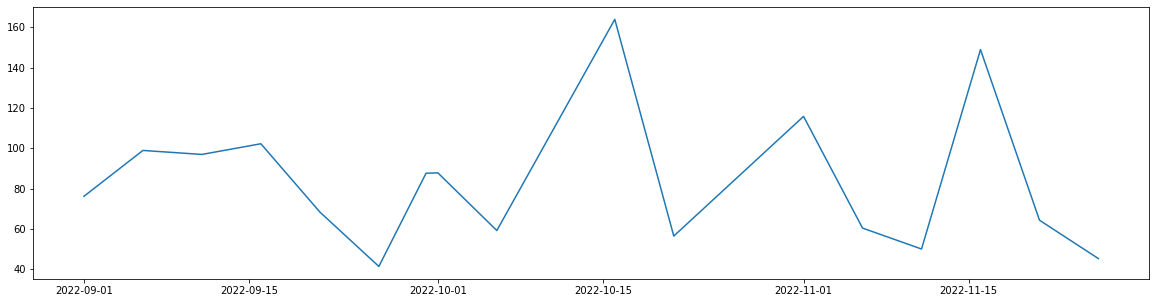

In [15]:
errors = []
start_days = []

for m in [9, 10, 11]:
  for d in [1, 6, 11, 16, 21, 26, 30]:
    date = datetime.date(2022, m, d)
    try:
      errors.append(backtest(df_, date))
      start_days.append(date)
    except:
      pass
plt.figure(figsize=(20, 5))
plt.plot(start_days, errors)

In [16]:
from datetime import datetime  from pathlib import Path​

def test_format_and_export_output(output_df, output_directory, name_of_the_group):
  output_columns = {"arc": object, "datetime": object, "debit_horaire": float,​ "taux_occupation": float}​

# 1. Check relevant columns are in output dataframe
assert sorted(list(output_df.columns)) == list(​output_columns.keys()​), "Some columns are missing or unnecessary columns are in output"

# 2. Check types​
for col, col_type in output_columns.items():​

assert output_df[col].dtype == col_type, f"Column {col} does not have type​

{col_type}"​

# 3. Check datetime string has right format  try:​

output_df.datetime.apply(lambda x: datetime.strptime(x, "%Y-%m-%d %H:%M"))  except ValueError as e:​

raise e​

# 4. Check `arc` columns has right values​

assert sorted(list(output_df["arc"].unique())) == [  "Champs-Elysées",​

"Convention",​

"Saint-Pères",​

], "Output does not have expected unique values for column `arc`"  # 5. Check dataframe has right number of rows​

assert output_df.shape[0] == 360, f"Expected number of rows is 360, output has​

{output_df.shape[0]}"  # 6. Export output​

output_path = Path(output_directory) / f"output_{name_of_the_group}.csv"  print(f"[SAVE OUTPUT] Saving output here: {output_path}")  output_df[output_columns.keys()].to_csv(output_path, sep=";")

SyntaxError: ignored

In [ ]:
test_format_and_export_output(my_output, "/Users/pansardcaroline/Desktop",​

"viguier_dekergaradec_pansard")